Nome: Francisco Jerônimo da Silva Júnior <br>
Matrícula: 433399

### Estimation of obesity levels based on eating habits and physical condition Data Set

Este conjunto de dados inclui dados para a estimativa dos níveis de obesidade em indivíduos dos países do México, Peru e Colômbia, com base em seus hábitos alimentares e condição física.

Endereço eletrônico do dataset: https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

### Importação das bibliotecas

In [1]:
import numpy as np # álgebra
import pandas as pd # processamento de dados

import matplotlib.pyplot as plt # visualização de dados
import seaborn as sns # visualização de dados

from sklearn.preprocessing import StandardScaler # escalonamento
from sklearn.preprocessing import MinMaxScaler # escalonamento

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering # algoritmos de agrupamento

from scipy.cluster import hierarchy # dendogramas

from sklearn.decomposition import PCA # redunção da dimensionalidade

from kneed import DataGenerator, KneeLocator

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Descrição das features

- **Gender**: Sexo 
- **Age**: Idade
- **Height**: Altura
- **Weight**: Peso 
- **family_history_with_overweight**:
- **FAVC**: Consumo frequente de alimentos altamente calóricos
- **FCVC**: Frequência de consumo de vegetais
- **NCP**: Número de refeições principais
- **CAEC**: Consumo de alimentos entre as refeições
- **SMOKE**: Fumante?
- **CH20**: Consumo de água diariamente
- **CALC**: Consumo de álcool
- **SCC**: Monitoramento do consumo de calorias
- **FAF**: Frequência de atividade física
- **TUE**: Tempo usando dispositivos de tecnologia
- **MTRANS**: Transporte usado

### Leitura do dataset

In [3]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv', usecols=range(0, 16))

### Visão parcial do dataset

In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


### Dimensões do dataset

In [5]:
print('Linhas: %s\nColunas: %s' % df.shape)

Linhas: 2111
Colunas: 16


###  Estatísticas Básicas

In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Informações extras

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

## Distribuição de dados

### Distribuição numérica

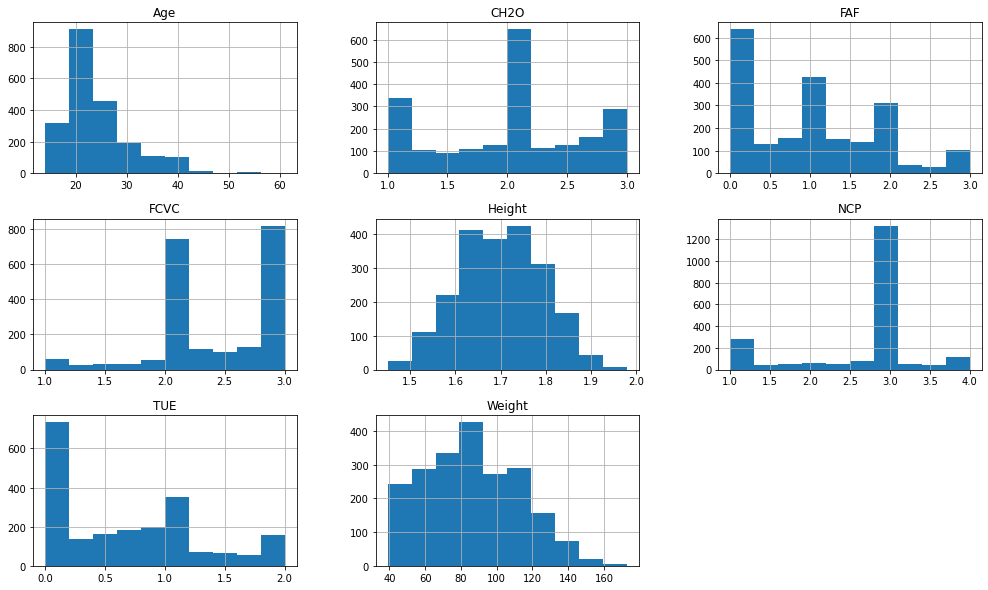

In [8]:
colunas_numericas = df.select_dtypes('float').columns

df[colunas_numericas].hist(figsize=(17, 10));

### Features Categóricas

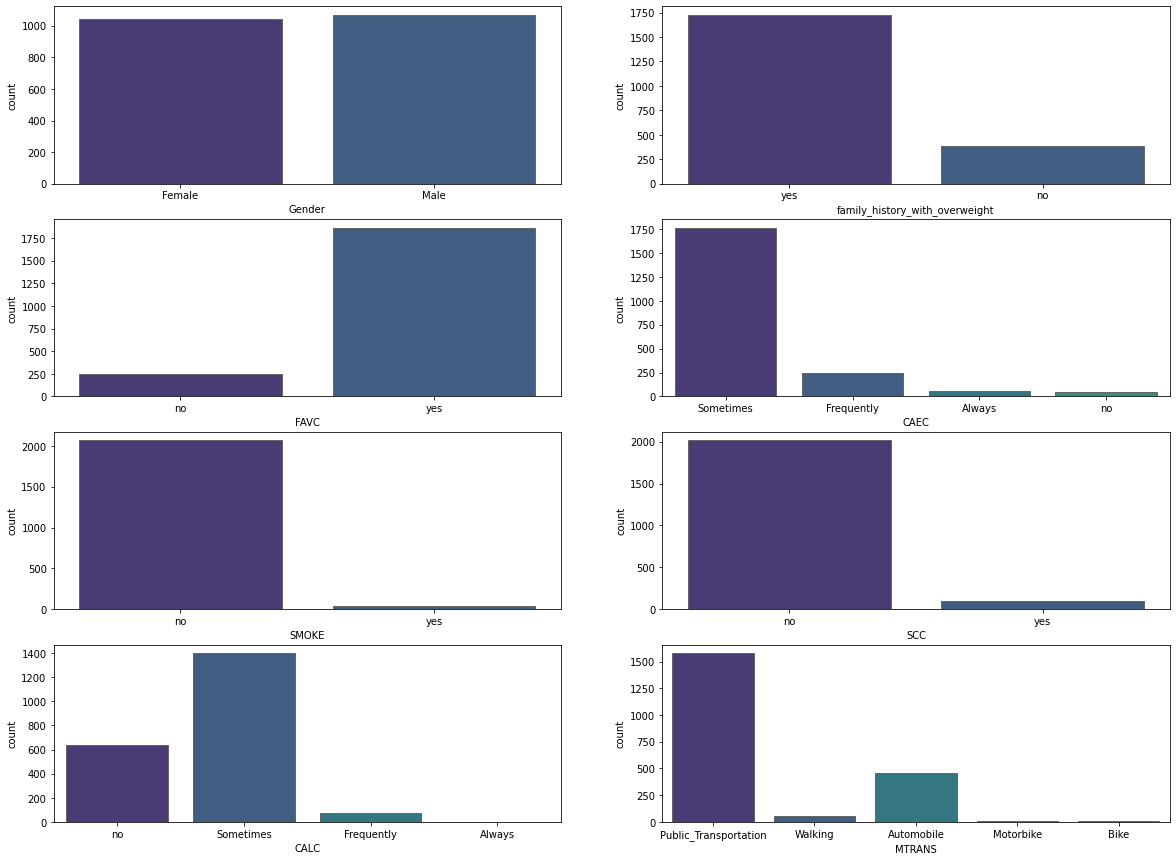

In [9]:
fig, ((ax1, ax2), (ax3 , ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))


sns.set_palette('viridis')

sns.countplot(x='Gender', data=df, ax=ax1, edgecolor='0.4');
sns.countplot(x='family_history_with_overweight', data=df,ax=ax2, edgecolor='0.4');
sns.countplot(x='FAVC', data=df, ax=ax3, edgecolor='0.4');
sns.countplot(x='CAEC', data=df, ax=ax4, edgecolor='0.4');
sns.countplot(x='SMOKE', data=df, ax=ax5, edgecolor='0.4');
sns.countplot(x='SCC', data=df, ax=ax6, edgecolor='0.4');
sns.countplot(x='CALC', data=df, ax=ax7, edgecolor='0.4');
sns.countplot(x='MTRANS', data=df, ax=ax8, edgecolor='0.4');

### Escalonamento

In [10]:
scaler  = StandardScaler()

df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])

### Encoding

In [11]:
df['Gender'] = df['Gender'].map({'Female' : 0, 'Male' : 1})
df['family_history_with_overweight'].map({'no' : 0, 'yes' :1})
df['SCC'] = df['SCC'].map({'no' : 0, 'yes' : 1})
df['SMOKE'] = df['SMOKE'].map({'no' : 0, 'yes' : 1})
df['FAVC'] = df['FAVC'].map({'no' : 0, 'yes' : 1})
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'no' : 0, 'yes' : 1})
df['CAEC'] = df['CAEC'].map({'no' : 0, 'Always' : 1, 'Frequently' : 2, 'Sometimes' : 3})
df['CALC'] = df['CALC'].map({'Always' : 0, 'Frequently' : 1,  'no' : 2, 'Sometimes' : 3})
df['MTRANS'] = df['MTRANS'].map({'Bike' : 0, 'Motorbike' : 1, 'Walking' : 2, 'Automobile' : 3, 
                                 'Public_Transportation' : 4})

## K-MEANS

### Função para ajuste do modelo

In [12]:
def k_means_learning(df, max_range):
    k_range = range(2, max_range+1) 
    inercia, models = [], []

    for k in k_range:
        km = KMeans(n_clusters=k)
        km.fit(df)
        models.append(km)
        inercia.append(km.inertia_)
    return inercia, models

In [13]:
inercia, modelos = k_means_learning(df, 15)

### Método do Cotovelo

Função plota o gráfico que apresenta os valores de inercia obtidos pelo ajuste do modelo de acordo com o número de clusters.

In [14]:
def cotovelo_plot(m_range, inercia):
    plt.figure(figsize=(17, 7))
    plt.grid()
    plt.plot(range(2, m_range+1), inercia, '-o', color='red')
    #plt.xticks(np.arange(2, 16, 1))
    plt.xlabel('Número de Clusters', fontsize=15)
    plt.ylabel('Inércia', fontsize=15);

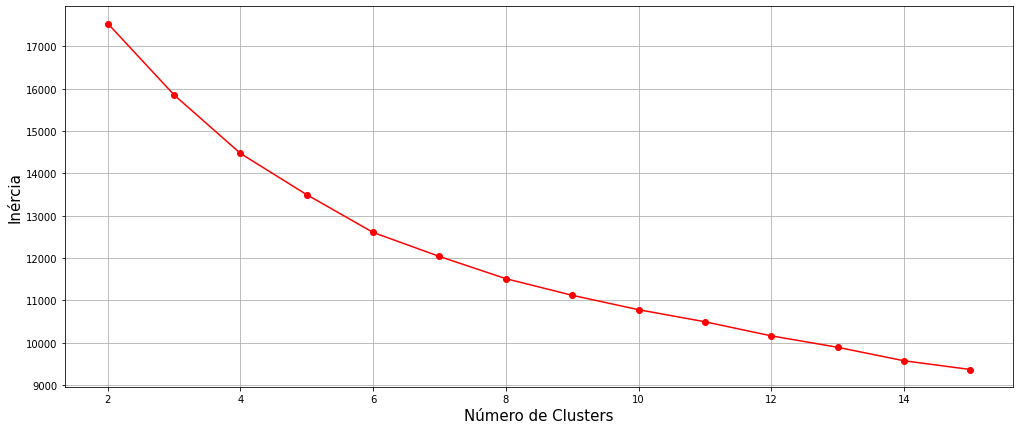

In [15]:
cotovelo_plot(15, inercia)

In [16]:
kl = KneeLocator(range(2, 16), inercia, curve="convex", direction="decreasing")

kl.elbow

6

### Visualização do agrupamento

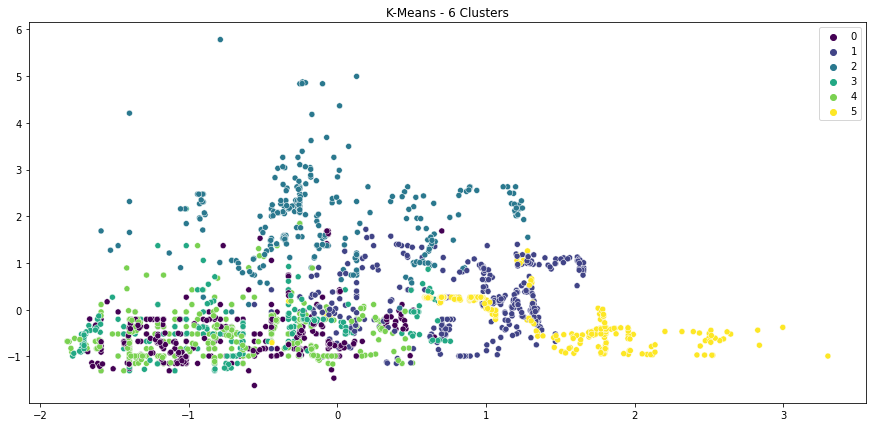

In [17]:
plt.figure(figsize=(15,7))
plt.title('K-Means - 6 Clusters')
sns.scatterplot
sns.scatterplot(df.loc[:, 'Weight'].values, df.loc[:, 'Age'].values, hue=modelos[4].labels_, palette='viridis');

### PCA

In [18]:
pca = PCA(n_components=2)

df_2D = pca.fit_transform(df)

In [19]:
inercia, modelos = k_means_learning(df_2D, 15)

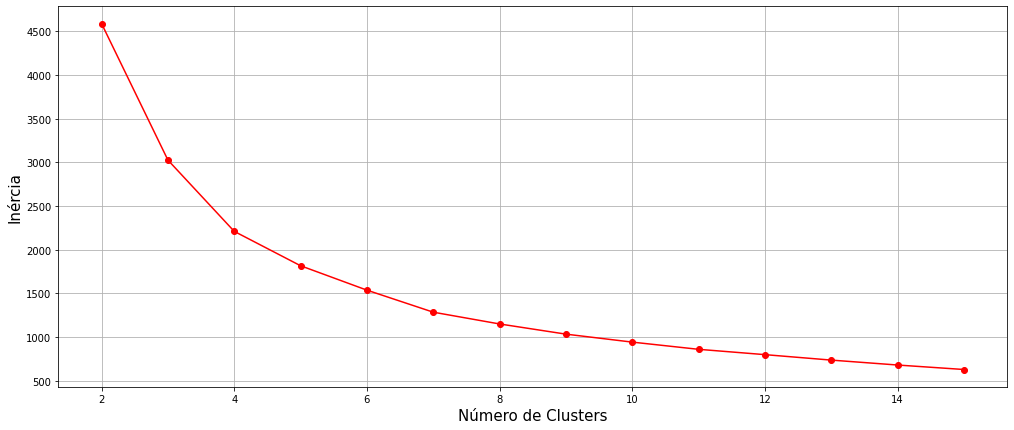

In [20]:
cotovelo_plot(15, inercia)

In [21]:
kl = KneeLocator(range(2, 16), inercia, curve="convex", direction="decreasing")

kl.elbow

5

### Visualização do agrupamento

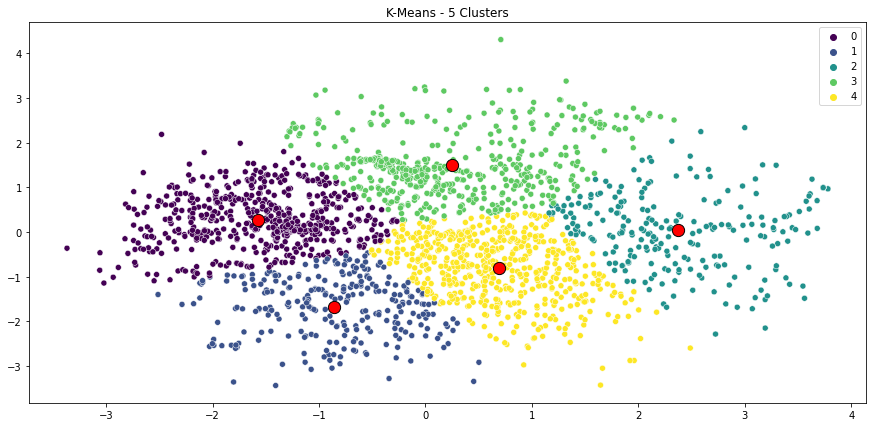

In [22]:
labels = modelos[3].labels_
plt.figure(figsize=(15,7))
plt.title('K-Means - 5 Clusters')
sns.scatterplot(df_2D[:, 0], df_2D[:, 1], hue=labels, palette='viridis');
sns.scatterplot(modelos[3].cluster_centers_[:, 0], modelos[3].cluster_centers_[:, 1],
                ec='black', s=150, color='red');

## Clusterização Hierárquica

In [23]:
def plots(labels, x, y):
    plt.figure(figsize=(15, 7))
    sns.scatterplot(x=df.loc[:, x], y=df.loc[:,  y], hue=labels,  palette='viridis');

### Dendogramas

In [24]:
# função para plotar os dendogramas
def dendo_plots(df):
    avg = hierarchy.average(df) 
    cmp = hierarchy.complete(df) 
    ward = hierarchy.ward(df)
    single = hierarchy.single(df)
    
    plt.figure(figsize=(15, 7))
    plt.title('Average')
    a = hierarchy.dendrogram(avg)
    plt.figure(figsize=(15, 7))
    plt.title('Complete')
    c = hierarchy.dendrogram(cmp)
    plt.figure(figsize=(15, 7))
    plt.title('Ward')
    w = hierarchy.dendrogram(ward)
    plt.figure(figsize=(15, 7))
    plt.title('Single')
    s = hierarchy.dendrogram(ward)

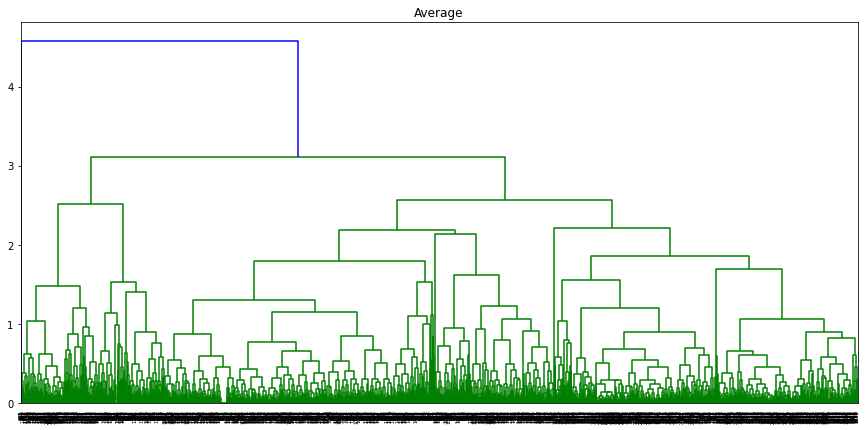

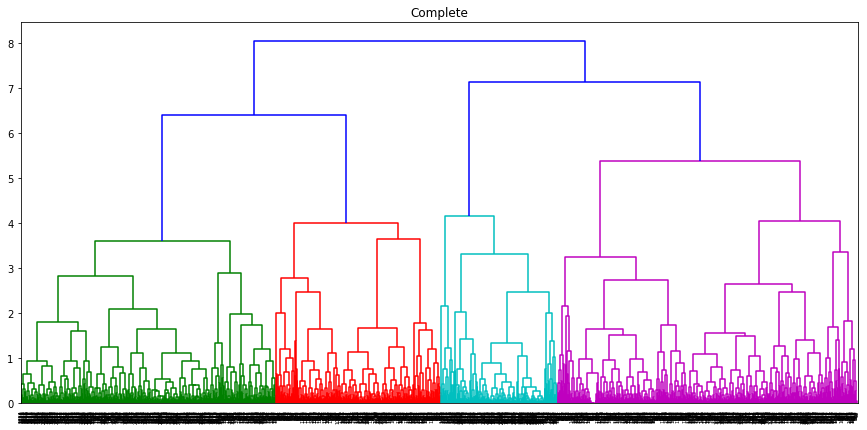

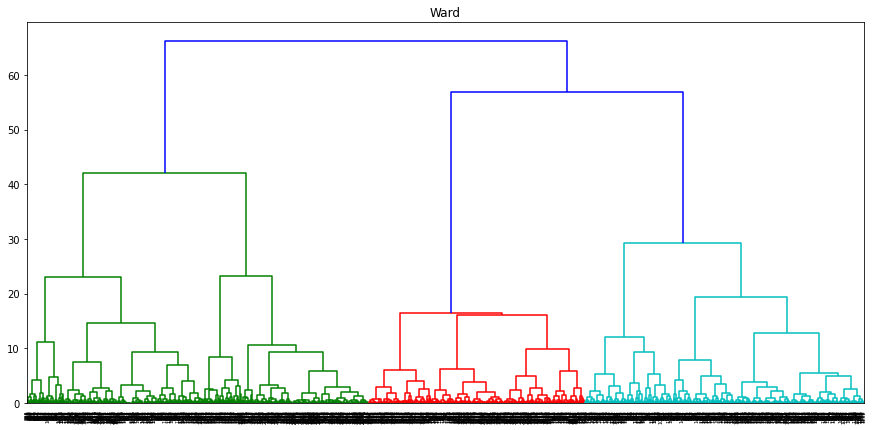

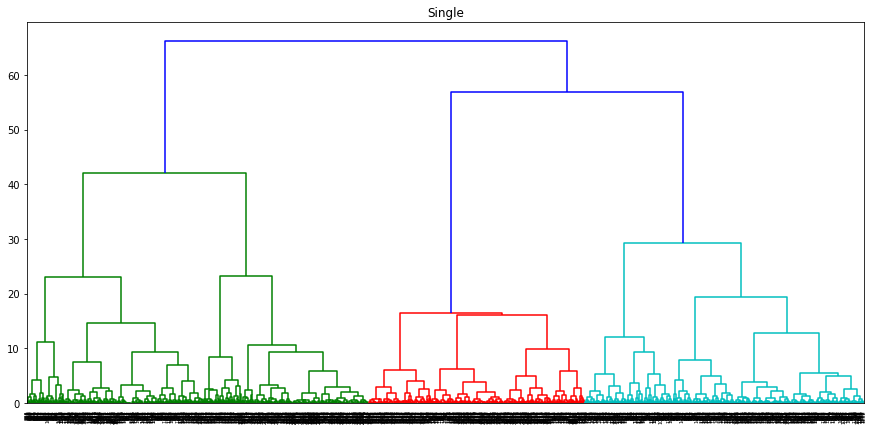

In [25]:
dendo_plots(df_2D)

### Ward

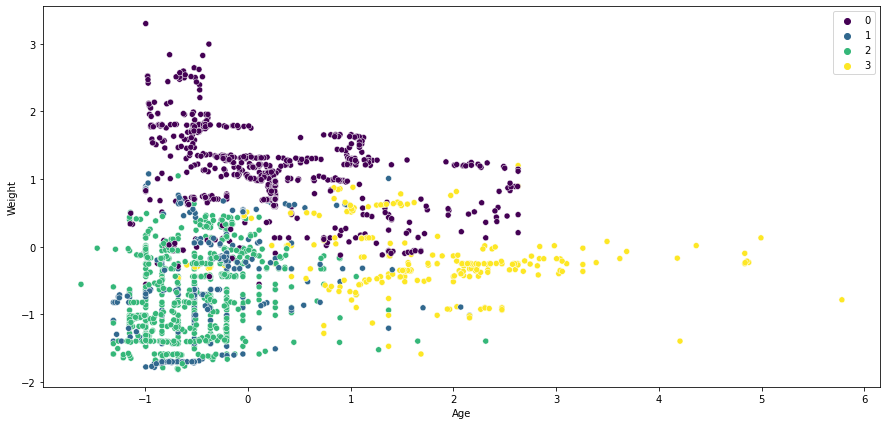

In [26]:
ward = AgglomerativeClustering(linkage='ward', n_clusters=4)
ward.fit(df)
plots(ward.labels_, 'Age', 'Weight')

### Complete

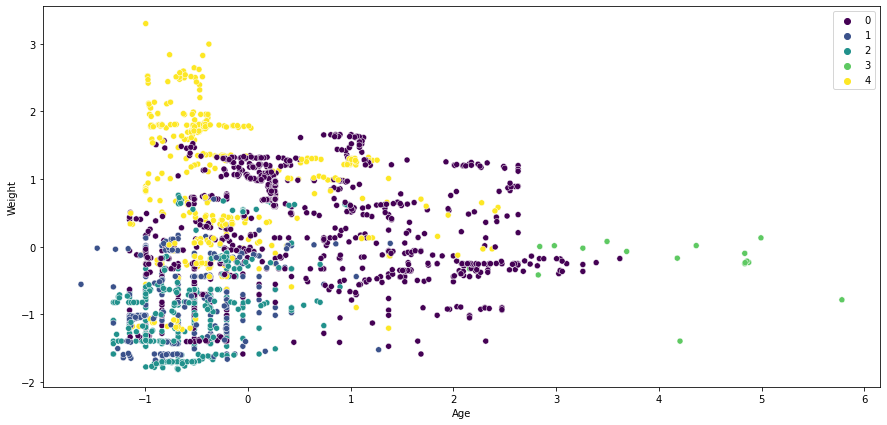

In [27]:
complete = AgglomerativeClustering(linkage='complete', n_clusters=5)
complete.fit(df)
plots(complete.labels_, 'Age', 'Weight')

### Average

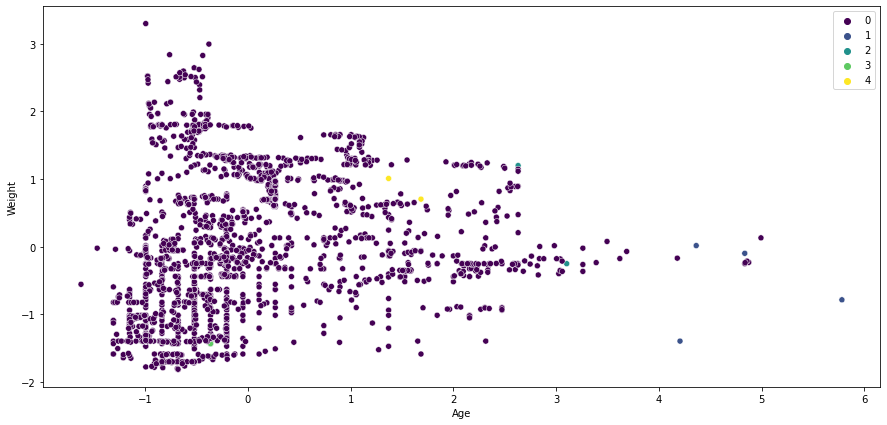

In [28]:
average = AgglomerativeClustering(linkage='average', n_clusters=5)
average.fit(df)
plots(average.labels_, 'Age', 'Weight')

### Single

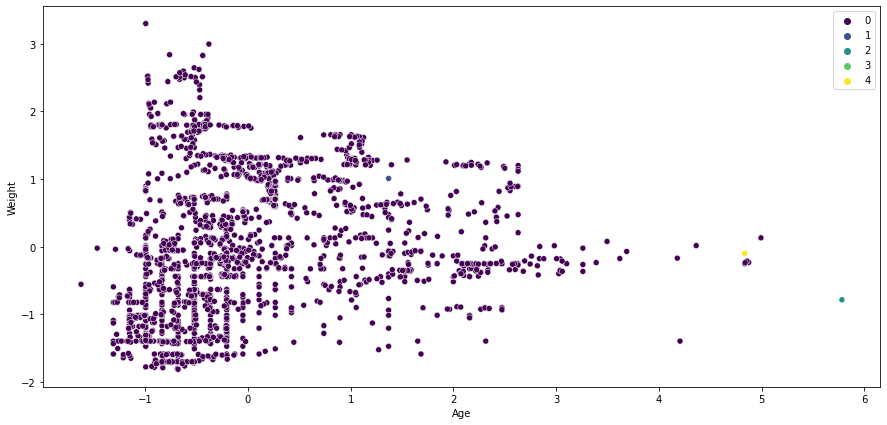

In [29]:
single = AgglomerativeClustering(linkage='single', n_clusters=5)
single.fit(df)
plots(single.labels_, 'Age', 'Weight')

In [30]:
def hierarchy_plot(data, clusters):
    x_, y_ = data[:, 0], data[:, 1]
    
    fig, axes = plt.subplots(2,2,  figsize=(15, 7))

    ag_model_ward = AgglomerativeClustering(linkage='ward', n_clusters=clusters)
    ag_model_ward.fit(data)
    sns.scatterplot(x=x_, y=y_, hue=ag_model_ward.labels_, ax=axes[0,0], palette='viridis');
    axes[0,0].set_title('Ward')

    ag_model_compl = AgglomerativeClustering(linkage='complete', n_clusters=clusters)
    ag_model_compl.fit(data)
    sns.scatterplot(x=x_, y=y_, hue=ag_model_compl.labels_, ax=axes[0,1], palette='viridis');
    axes[0,1].set_title('Complete')


    ag_model_avg = AgglomerativeClustering(linkage='average', n_clusters=clusters)
    ag_model_avg.fit(data)
    sns.scatterplot(x=x_, y=y_, hue=ag_model_avg.labels_, ax=axes[1,0], palette='viridis');
    axes[1,0].set_title('Average')

    ag_model_sg = AgglomerativeClustering(linkage='single', n_clusters=clusters)
    ag_model_sg.fit(data)
    sns.scatterplot(x=x_, y=y_, hue=ag_model_sg.labels_, ax=axes[1,1], palette='viridis');
    axes[1,1].set_title('Single');

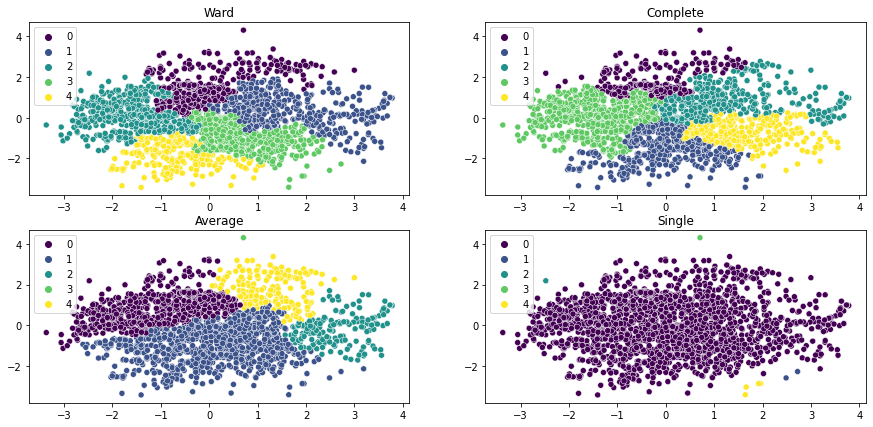

In [31]:
hierarchy_plot(df_2D, 5)

## DBSCAN

In [32]:
def plot_dbscan(labels):
    plt.figure(figsize=(15,7))
    sns.scatterplot(x=df_2D[:, 0], y=df_2D[:, 1], hue=labels,  palette='viridis');

#### Execução 01

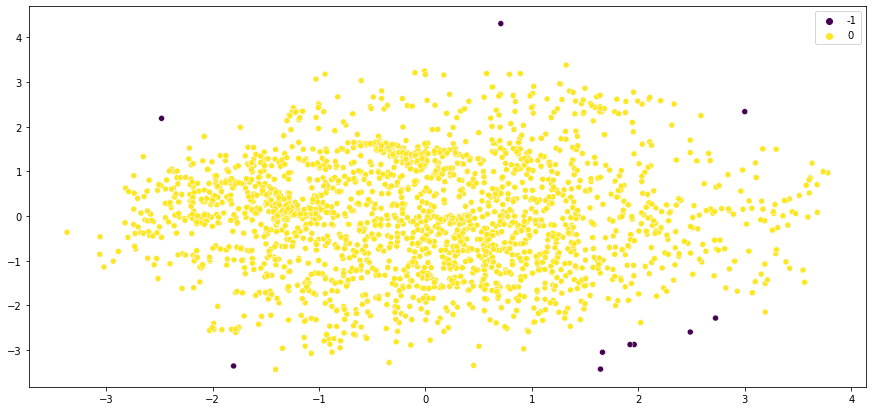

In [33]:
# instanciação
dbscan = DBSCAN(eps=0.5, min_samples=5)

# ajuste
dbscan.fit(df_2D)

# plot
plot_dbscan(dbscan.labels_)

#### Execução 02

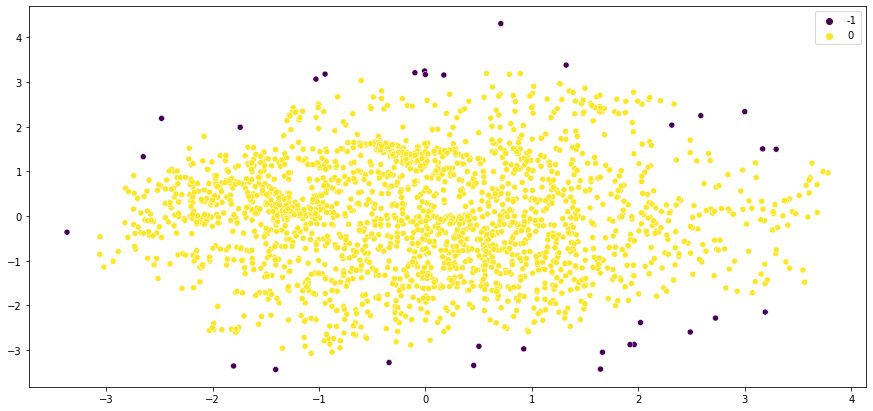

In [34]:
# instanciação
dbscan = DBSCAN(eps=0.35, min_samples=5)

# ajuste
dbscan.fit(df_2D)

# plot
plot_dbscan(dbscan.labels_)

#### Execução 03

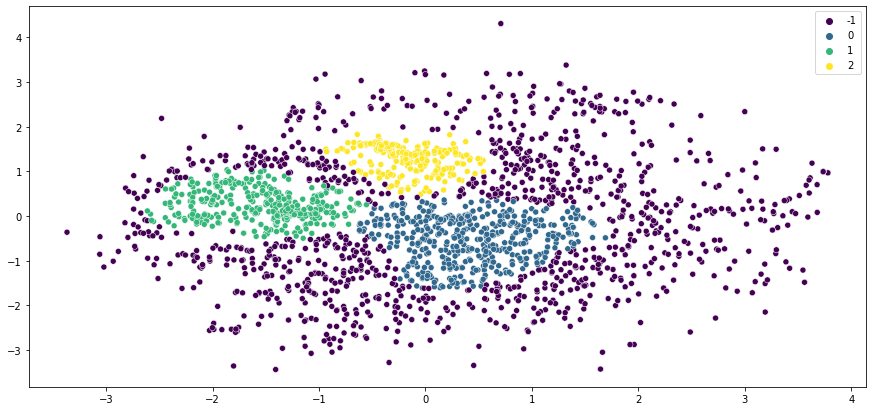

In [35]:
# instanciação
dbscan = DBSCAN(eps=0.3, min_samples=40)

# ajuste
dbscan.fit(df_2D)

# plot
plot_dbscan(dbscan.labels_)